## Building better prompts

An interesting window is open in most of the LLMs for tuning chat completions for usefulness.
We begin with the basics of a Chat Completions API, and progress through prompt engineering tactics.

## Import library(-ies)

In [30]:
# Source keys from an .env
from dotenv import load_dotenv
# Source operating system resources
import os
# Access libraries for AI  
from openai import OpenAI
# Standard library for API requests
import requests
# Enable working with Unix timestamps
from datetime import datetime
# Enable working with json
import json
# Enable display of html responses
from IPython.display import display, HTML, Markdown, Latex
# Iterate paths and more
from pathlib import Path
# For basic file handling 
import shutil
# Search efficently
import re

In [39]:
# Load environment variables
load_dotenv()
api_key_pplx = os.getenv('PPLX_API_KEY')
api_key_claude = os.getenv('CLAUDE_API_KEY')

## Authenticate

In [38]:
# Anthropic
# curl https://api.anthropic.com/v1/messages --header "x-api-key: YOUR_API_KEY" ...
base_url_claude = ""

In [40]:
# Perplexity
base_url_pplx = "https://api.perplexity.ai"

## Keep it DRY

In [42]:
# Choose model
model = "llama-3-sonar-large-32k-online"

# Create a client
client = OpenAI(api_key=api_key_pplx, base_url=base_url_pplx)

In [43]:
# Make a request
def get_completion(user_prompt, system_role, model):
    messages = [
        {"role": "system", "content": system_role},
        {"role": "user", "content": user_prompt}
    ]

    # chat completion without streaming
    response = client.chat.completions.create(
        model=model,
        messages=messages,
    )
    # Print the message content
    return response

In [44]:
# Accomodate common formats
def get_completion_json(system_role, user_prompt, model):
    # Note authentication is configured above

    
    # chat completion without streaming
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        response_format={"type": "json_object"}
    )
                         
    # Print the message content
    return response

In [45]:
# Print the content of the response
def summarize_message(from_the_ai):
    # Summarize the message
    print(f"The {response.choices[0].message.role} role finished \n♢ with \"{response.choices[0].finish_reason}\" at: {datetime.fromtimestamp(response.created)}")
    print(f"The model used was: {response.model}")
    print(f"♢ The message was: \n\n{response.choices[0].message.content}")

In [46]:
# Pretty print HTML response
def pretty_print_html(from_the_ai):
    display(HTML(response.choices[0].message.content))

In [47]:
# Pretty print Markdown response
def pretty_print_markdown(from_the_ai):
    display(Markdown(response.choices[0].message.content))

## Processing files

1. Use the latest models. For perplexity.ai API there is a [list](https://docs.perplexity.ai/docs/model-cards):   
2. Instructions must be clear and specific
3. Instruct at the beginning of the prompt
4. Delimit distinct parts with delimiters and use variables to chunk roles, instructions  

5. Precise, __descriptive__, with sufficient detail

### Jupyter Notebooks interface  
In general, it's important to understand that the Jupyter Notebook interface, while very convenient for **iterative development and exploration**, does not automatically persist the full execution state across sessions by default. For long-running jobs or important intermediate results, we explicitly save artifacts to disk.   

We also look into workflow tools like Papermill to parameterize and execute notebooks in a more automated fashion that saves the output.  

In [48]:
# Create a basic file handling function
# Previously we import os
# AND import shutil

def copy_item(src, dst):
    try:
        if os.path.isfile(src):
            # Copia o arquivo (Copy the file)
            shutil.copy(src, dst)
        elif os.path.isdir(src):
            # Copia a pasta e seu conteúdo (Copy the folder and its contents)
            shutil.copytree(src, dst)
        else:
            print(f"Item não encontrado: {src}")
            return
        
        print(f"Item copiado com sucesso: {src} -> {dst}")
    except FileExistsError:
        print(f"O item de destino já existe: {dst}")
    except PermissionError:
        print(f"Permissão negada ao copiar o item: {src}")
    except Exception as e:
        print(f"Erro ao copiar o item: {src} - {str(e)}")

def move_item(src, dst):
    try:
        # Move o arquivo ou pasta (Move the file or folder)
        shutil.move(src, dst)
        print(f"Item movido com sucesso: {src} -> {dst}")
    except FileNotFoundError:
        print(f"Item de origem não encontrado: {src}")
    except shutil.Error as e:
        print(f"Erro ao mover o item: {src} - {str(e)}")
    except Exception as e:
        print(f"Erro ao mover o item: {src} - {str(e)}")

def delete_item(item_path):
    try:
        if os.path.isfile(item_path):
            # Remove o arquivo (Remove the file)
            os.remove(item_path)
        elif os.path.isdir(item_path):
            # Remove a pasta e seu conteúdo (Remove the folder and its contents)
            shutil.rmtree(item_path)
        else:
            print(f"Item não encontrado: {item_path}")
            return
        
        print(f"Item excluído com sucesso: {item_path}")
    except PermissionError:
        print(f"Permissão negada ao excluir o item: {item_path}")
    except Exception as e:
        print(f"Erro ao excluir o item: {item_path} - {str(e)}")

### Basic prompts

In [13]:
# In which we demonstrate AI does not really grok comedy

import re

system_role = '''
You are a bitingly sarcastic comedian.
You only make jokes that are guaranteed to make someone laugh nut a bit uncomfortable.
Some of your best humor is almost inappropriate--but always laughable.
Your task is to analyze a joke and come up with a better, edgier version of it.
'''

# Read files
file_path = '../data/raw/dad_jokes.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Iterate over each line in the file
    for line in file:
        # Remove the newline character at the end of the line
        joke = line.strip()

        # Check if the line contains a joke
        if re.search(r'why\s+did\s+the', joke, re.IGNORECASE):
            text = f'''
            1. Rate the "{joke}" for how vanilla it is on a scale of 1 to 10 (1 being the most vanilla).
            2. What edges of normal thinking make this humorous?
            3. Return a new_joke that adds some unexpected twist or wordplay.
            '''

            prompt = f'''
            Using "{text}" 
            Give us something about: "{joke}"
            '''

            response = get_completion(user_prompt=prompt, system_role=system_role, model=model)
            pretty_print_markdown(response)
            print("-" * 20)
        else:
            print(f"Skipping line: {joke} (not a valid joke format)")

1. I'd rate this joke a 2 out of 10 for its vanilla-ness. It's a play on words, but it's still a pretty tame and family-friendly pun.

2. To make this joke edgier, we could add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor. Here are a few ideas:
   - Add a darker or more mature theme to the joke.
   - Use more provocative language or innuendo.
   - Subvert the expected punchline with something more unexpected or uncomfortable.

3. Here's a new joke that adds some unexpected twist or wordplay to push the envelope:

"Why did the tomato go out with a prune? Because it was desperate for a connection and willing to settle for someone a little dried up and past their prime. Kind of like your aunt at a wedding."

This new joke takes the original pun and adds a layer of discomfort by making the tomato's motivations more relatable but also more pathetic. The added comparison to an aunt at a wedding adds a touch of dark humor and makes the joke more unexpected and edgy.

--------------------


1. **Vanilla Rating: 2**
   This joke is a classic, but it's a bit too innocent and straightforward. It's a great starting point, but it needs some spice to make it truly memorable.

2. **What would make it edgier?**
   To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor. Here are a few ideas:
   - Add a darker or more ironic twist to the punchline.
   - Use wordplay to create a double entendre or an uncomfortable connection.
   - Make the setup more relatable or realistic, but with an unexpected payoff.

3. **New Joke:**
   Here's a revised version with an edgier twist:
   "Why did the kid throw his clock out the window during a custody battle? Because he wanted to see time fly, and his parents' marriage crash!"

   This new joke adds a darker, more relatable setup (a custody battle) and connects the idea of "time flying" to the more uncomfortable concept of a marriage crashing. The unexpected twist creates a sense of unease, making the joke more memorable and edgy.

--------------------


1. **Vanilla Rating: 8** - This joke is pretty tame and family-friendly, relying on a simple pun to elicit a chuckle. It's not particularly original or edgy, making it suitable for all ages.

2. **What would make it edgier?** - To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor. This could involve incorporating darker themes, clever wordplay, or even some subtle innuendo.

3. **New Joke:**
"Why did the bicycle fall over? Because it was two-tired... and its therapist said it needed to work on its balance issues, but honestly, it was just a victim of its own existential crisis, wondering if it was more than just a mode of transportation, or if it was truly living a life of purpose."

This revised joke takes the original pun and adds a layer of complexity by introducing themes of mental health, existentialism, and the search for meaning. The unexpected twist and clever wordplay make it edgier and more thought-provoking, while still maintaining a hint of dark humor.

--------------------


1. I'd rate this joke a 2 out of 10 for vanilla-ness. It's a classic play on the idea of anthropomorphizing animals, but it's still pretty tame.

2. To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable. Here are a few ideas:

- Make the cow's insult more personal or controversial.
- Add a darker or more ironic twist to the kid's reaction.
- Use wordplay to create a more uncomfortable or unexpected connection between the cow and the kid.

3. Here's a new joke that adds some unexpected twist or wordplay:

"Why did the kid throw his milk on the floor? The cow called him a 'lactose intolerant little bastard' and he was still reeling from his mom's divorce."

This version of the joke takes the classic setup and adds a darker, more uncomfortable twist. The cow's insult is more personal and controversial, and the kid's reaction is now tied to a deeper emotional issue. The added layer of complexity and unexpectedness makes the joke edgier and more memorable.

--------------------
Skipping line: Why can't a bicycle stand up by itself? It's two-tired! (not a valid joke format)


1. **Vanilla Rating: 8** - This joke is about as vanilla as it gets. It's a classic playground pun that's been told to kids since the dawn of recess. It's cute, it's innocent, and it's utterly forgettable.

2. **What would make it edgier?** - To make this joke edgier, we need to add some unexpected darkness, a dash of controversy, or a pinch of irreverence. We need to take this joke from the playground to the therapist's couch.

3. **New Joke:** "Why did the kid cross the playground? To escape the emotional trauma of being forced to share the swings with their estranged father during supervised visitation hours!"

--------------------


1. **Vanilla Rating: 4**
This joke is a classic play on words, but it's still relatively tame. The pun on "pupil" is clever, but it doesn't push any boundaries or make anyone squirm in their seat.

2. **What would make it edgier?**
To make this joke edgier, we need to add some unexpected darkness, morbidity, or controversy. We could explore themes like self-mutilation, violence, or even a hint of the supernatural. The goal is to make the audience uncomfortable while still maintaining a level of cleverness and wordplay.

3. **New Joke:**
"Why did the kid gouge out his eye and throw it across the room? He wanted to get to the core of his identity crisis, and there was a pupil in it... and also a piece of his soul that he couldn't bear to look at anymore."

This revised joke takes the original pun and adds a layer of psychological complexity and self-destructive behavior. The phrase "get to the core of his identity crisis" implies a deeper, darker issue, while "a piece of his soul" adds a hint of the supernatural and existential dread. The result is a joke that's both clever and unsettling, making the audience laugh while also feeling a twinge of discomfort.

--------------------


1. I'd rate this joke a 2 out of 10 for its vanilla-ness. It's a classic play on words, but it's so tame and predictable that it's almost forgettable.

2. What makes this joke so vanilla is its complete lack of controversy or surprise. It's a straightforward pun that doesn't challenge the listener in any way. To make it edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor.

3. Here's a revised version that adds a bit of an uncomfortable twist:

"Why did the kid take a pencil to bed? To draw the curtains...and the abuse allegations!"

This new joke takes the original pun and adds a dark, unexpected layer that makes the listener uncomfortable. The addition of "abuse allegations" is a jarring twist that subverts the expectation of a lighthearted joke, making it edgier and more memorable.

--------------------


1. **Vanilla Rating: 2**
This joke is a classic, but it's as tame as a kitten on a Sunday afternoon. The punchline is predictable and lacks any real bite. It's a joke your grandma would tell at a family reunion.

2. **What would make it edgier?**
To take this joke to the next level, we need to add some darkness, some controversy, or some unexpected twist that makes people squirm in their seats. We could explore themes like childhood trauma, rebellion, or even a hint of violence.

3. **New Joke:**
"Why did the kid throw the clock out the window? Because it was the only way to silence the constant reminder that they're running out of time before their parents' divorce is finalized and their whole world comes crashing down!"

This revised joke takes the original's innocent play on words and turns it into a commentary on the harsh realities of childhood. The added layer of complexity and emotional depth makes it more relatable, yet uncomfortable, which is exactly what we're going for. It's like a punch in the gut, but with a clever twist that leaves the audience laughing and cringing at the same time.

--------------------


1. I'd rate this joke a 2 out of 10 for its vanilla-ness. It's a classic, simple, and somewhat predictable joke that doesn't really push any boundaries.

2. To make this joke edgier, we need to add some unexpected twist or wordplay that makes the audience slightly uncomfortable. Here are a few suggestions:
   - Add a darker or more sinister tone to the punchline.
   - Use wordplay to create a double entendre or innuendo.
   - Make the setup more relatable or unexpected.

3. Here's a new joke that adds some unexpected twist and wordplay to push the envelope of socially-acceptable humor:

New Joke: "Why did the kid throw his shoe out the window? Because he finally figured out where his dad's sperm went after that one wild night!"

This new joke takes the original setup and adds a darker, more unexpected twist to the punchline. The reference to sperm and a wild night creates a sense of unease and surprise, making the joke edgier and more memorable.

--------------------


1. I'd rate this joke a 2 out of 10 for its vanilla-ness. It's a classic play on words, but it's so tame and predictable that it's almost boring.

2. To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor. Here are a few suggestions:
   - Add a darker or more sinister tone to the joke.
   - Use wordplay that's a bit more risqué or taboo.
   - Introduce an unexpected element that subverts the listener's expectations.

3. Here's a revised version of the joke that adds some unexpected twist and wordplay to make it edgier:

   "Why did the kid throw his pillow out the window? He wanted to sleep like a log, but his therapist said he needed to work on his 'boundary issues' first."

   This revised joke takes the original and adds a darker, more sinister tone by introducing the idea of a therapist and "boundary issues." It's still a play on words, but it's now more unexpected and edgy, making it more likely to elicit an uncomfortable laugh from the audience.

--------------------


1. **Vanilla Rating: 8**
This joke is pretty tame. It's a classic play on words, but it's not exactly going to make anyone squirm in their seat. It's more likely to elicit a groan or a chuckle from a 5-year-old.

2. **What would make it edgier?**
To make this joke edgier, we need to add some unexpected darkness or subversion. Maybe something that pokes fun at societal norms or pushes the boundaries of what's considered "acceptable" in a joke. We could also add some wordplay that's a bit more risqué or clever.

3. **New Joke:**
"Why did the kid throw the butter out the window? Because it was a dairy-abused child seeking a ghee-orous escape from its lactose-intolerant household!"

This new joke takes the original and adds a layer of dark humor by referencing child abuse and dairy allergies. The use of "ghee-orous" (a play on "gigorous" and "ghee," a type of clarified butter) adds a clever twist on the wordplay, making it more unexpected and edgy. It's not for everyone, but that's what makes it funny.

--------------------


1. I'd rate this joke a 2 out of 10 for its vanilla-ness. It's a cute, innocent joke that's suitable for kids and doesn't really challenge any social norms.

2. To make this joke edgier, we could add some darker or more unexpected elements to it. For example, we could make the kid's motivations more sinister or add some consequences to their actions that are a bit unsettling.

3. Here's a new joke that adds some unexpected twists:

"Why did the kid throw the crayons at the sun? He wanted to color the day... and also set the world on fire because his art teacher told him his drawings were mediocre."

This new joke takes the original's innocence and turns it on its head by adding a darker motivation to the kid's actions. The addition of the art teacher's criticism adds a layer of relatability, but the desire to set the world on fire takes it to a more uncomfortable and edgy place.

--------------------


1. I'd rate this joke a 2 out of 10 for vanilla-ness. It's a classic play on words, but it's still pretty tame and family-friendly.

2. To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor. Here are a few ideas:

   - Add a darker or more ironic twist to the punchline.
   - Use wordplay that's a bit more risqué or provocative.
   - Make the setup more relatable or uncomfortable.

3. Here's a new joke that adds some unexpected twist:

   "Why did the kid throw his therapist out the window? To finally get some air to his head... and a decent copay!"

This new joke takes the original and adds a darker, more ironic twist by making the thing being thrown out the window a therapist, implying that the kid's mental health issues are so severe that they need to get rid of their therapist. The added phrase "and a decent copay" is a bit of dark humor that pokes fun at the often-expensive nature of mental health care. This joke is edgier because it tackles a more serious topic like mental health and adds a layer of irony and dark humor.

--------------------


1. I'd rate this joke a 2 out of 10 for vanilla-ness. It's a classic play on words, but it's still a relatively tame and family-friendly joke.

2. To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable. Here are a few ideas:
   - Add a darker or more unexpected reason for the kid throwing the clock out the window.
   - Use wordplay that's a bit more risqué or taboo.
   - Introduce a character or situation that's not typically found in family-friendly jokes.

3. Here's a new joke that adds some unexpected twist or wordplay:

"Why did the kid throw the clock out the window? His abusive father said it was time to face the consequences, and the kid took it literally."

This new joke takes the original and adds a darker, more uncomfortable twist. The addition of an "abusive father" adds a layer of complexity and unease, making the joke more edgy and pushing the envelope of what's socially acceptable.

--------------------


1. **Vanilla Rating: 2**
This joke is about as vanilla as it gets. It's a classic play on words, but it's so clean and family-friendly that it's almost boring. I mean, who doesn't love a good "light" pun? It's the kind of joke your grandma would tell at a church potluck.

2. **What would make it edgier?**
To make this joke edgier, we need to add some darkness, some controversy, or some unexpected twist that makes people squirm in their seats. Maybe we can make the kid's motivation more sinister or the consequences of the action more dire. We could also add some wordplay that's a bit more...unsettling.

3. **New Joke:**
"Why did the kid throw the lamp out the window? He wanted to see if the light would still shine after it crushed someone's dreams!"

This new joke takes the original and adds a layer of morbid curiosity. The kid isn't just interested in seeing a light move; they're fascinated by the destructive power of their actions. It's a joke that makes you laugh, but also makes you wonder what kind of messed-up kid would think like that. The added twist of "crushed someone's dreams" adds a level of emotional darkness that makes the joke more uncomfortable and, therefore, more interesting.

--------------------


1. **Vanilla Rating: 3**
This joke is pretty tame, relying on a simple play on words. It's a classic, but it's not going to make anyone squirm in their seat.

2. **What Would Make It Edgier:**
To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable. Here are a few ideas:
   - **Dark Humor:** Introduce a morbid or unsettling element to the joke.
   - **Inappropriate Wordplay:** Use words or phrases that are slightly off-color or taboo.
   - **Uncomfortable Implications:** Suggest something that might make the audience feel uneasy.

3. **New Joke:**
"Why did the kid throw the calendar out the window? Because it was a reminder that they're still a virgin and their life is going nowhere fast!"

This new joke adds a layer of dark humor and uncomfortable implications, making it edgier and more likely to elicit a mix of laughter and unease from the audience.

--------------------


1. I'd rate this joke a 2 out of 10 for vanilla-ness. It's a classic play on words, but it's still pretty tame and family-friendly.

2. To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable. Here are a few ideas:
   - Add a darker or more controversial element to the punchline.
   - Use wordplay that's a bit more risqué or off-color.
   - Subvert the expectation of the setup by taking the joke in a completely different direction.

3. Here's a new joke that adds some unexpected twist or wordplay to push the envelope:

"Why did the kid throw the baseball out the window? To see if it could hit a batter... or at least someone who's not his mom, for once."

This version adds a darker, more uncomfortable element to the punchline by implying that the kid might have a troubled home life. It's still a play on words, but it's edgier and more unexpected, making it more likely to elicit a mix of laughter and discomfort from the audience.

--------------------


1. **Vanilla Rating: 2**
This joke is about as vanilla as a joke can get. It's a classic play on words, but it's so clean and family-friendly that it's almost too innocent. It's the kind of joke your grandma would tell at a church potluck.

2. **What would make it edgier?**
To make this joke edgier, we need to add some unexpected darkness or subversion. Maybe we can make the kid's motivations more sinister or the consequences more severe. We could also add some wordplay that's a bit more risqué.

3. **New Joke:**
"Why did the kid throw the remote out the window? Because it was the only way to silence the voice of their abusive stepdad who was yelling at them through the TV!"

This new joke takes the original and adds a layer of darkness and complexity. It's no longer just a cute play on words; it's a commentary on the harsh realities of domestic abuse. The unexpected twist adds an edge that will make people uncomfortable, but that's what makes it memorable.

--------------------


1. **Vanilla Rating: 2** - This joke is about as vanilla as it gets. It's a classic, kid-friendly joke that's been told and retold without any real bite or controversy.

2. **What would make it edgier?** - To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor. We could explore themes that are a bit more mature or taboo, like bodily functions, social issues, or even dark humor.

3. **New Joke:**
"Why did the kid throw the toilet paper out the window? He wanted to see if the wind could blow away his dad's alimony payments!"

This new joke takes the original and adds a layer of complexity by introducing a more mature theme (alimony payments) and a hint of dark humor. The unexpected twist creates a sense of discomfort, making the joke edgier and more memorable.

--------------------


In [37]:
response_assessment = """
I'd rate this joke a 2 out of 10 for its vanilla-ness. It's a classic play on words, but it's been done to death and doesn't really push any boundaries.

To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable. Here are a few ideas:

Make the punchline more risqué or suggestive.
Add some dark humor or irony.
Use wordplay that's a bit more clever or unexpected.
Here's a new joke that adds some unexpected twist or wordplay: "Why did the tomato go out with a prune? Because it was desperate for a dry, flavorless relationship and didn't care about the long-term consequences of getting wrinkled!"

This new joke takes the original and adds a layer of dark humor and irony. The punchline is more risqué and suggestive, implying that the tomato is willing to settle for a bad relationship just to have something. The use of "dry, flavorless" and "wrinkled" adds a clever play on words, referencing both the prune's physical characteristics and the negative aspects of the relationship. This joke is edgier and more uncomfortable, making it more memorable and impactful.

--------------------
I'd rate this joke a 2 out of 10 for vanilla-ness. It's a classic play on words, but it's been done to death and is pretty tame.

To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable. Here are a few ideas:

Make the joke more relatable to a darker aspect of life.
Add a layer of irony or unexpected consequence.
Use wordplay that's a bit more risqué.
Here's a new joke that adds some unexpected twist: "Why did the kid throw his clock out the window during a funeral? To see time fly... and to finally give his dead grandma some peace from her constant nagging about being on time!"

This new joke takes the classic play on words and adds a darker, more unexpected twist by setting it during a funeral. The added layer of irony and the morbid humor make it edgier and more uncomfortable, which is perfect for a comedian who likes to push boundaries.

--------------------
Rating the Vanilla Level: I'd rate this joke a 1 out of 10 for its vanilla level. It's a classic, clean, and family-friendly joke that's been around for ages. It's the kind of joke your grandma would tell at a church potluck dinner.

What Would Make It Edgier: To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor. Here are a few ideas:

Add a darker or more ironic twist to the punchline.
Use wordplay that's a bit more risqué or suggestive.
Make the setup more relatable to adult experiences or struggles.
New Joke with an Unexpected Twist: Here's a revised version with an edgier twist:

"Why did the bicycle fall over? Because it was two-tired... and so am I after last night's Tinder date. I guess we both needed a little more 'brake' in our lives."

In this version, I've added a relatable adult experience (Tinder dates) and a bit of wordplay with "brake" to give it a more unexpected twist. The joke still has a lighthearted tone, but it's now more geared towards an adult audience and has a bit of an edge to it.

--------------------
I'd rate this joke a 2 out of 10 for its vanilla-ness. It's a classic, but it's also a bit too innocent and predictable. The punchline is cute, but it doesn't really challenge the listener or make them uncomfortable.

To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor. Here are a few ideas:

Make the cow's insult more provocative or controversial.
Add a darker or more ironic twist to the kid's reaction.
Introduce an unexpected character or element that subverts the listener's expectations.
Here's a revised version of the joke that adds some edge: "Why did the kid throw his milk on the floor? The cow called him a 'lactose intolerant little snowflake' and he couldn't handle the truth!"

In this version, the cow's insult is more provocative and slightly offensive, which adds a layer of discomfort to the joke. The use of the term "snowflake" also adds a bit of irony and social commentary, making the joke more edgy and unexpected.

--------------------
Skipping line: Why can't a bicycle stand up by itself? It's two-tired! (not a valid joke format)
Vanilla Rating: 2 - This joke is about as vanilla as it gets. It's a classic playground pun that's been told to kids for generations. It's so innocent and wholesome that it's almost... boring.

What would make it edgier? - To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable. Here are a few ideas:

Add a darker or more mature theme to the punchline.
Use wordplay that's a bit more risqué or taboo.
Subvert the expectation of a typical playground joke.
New Joke: "Why did the kid cross the playground? To get away from the pedophile on the other slide!" - This new joke takes the classic playground setup and turns it on its head by adding a dark and uncomfortable twist. The word "pedophile" is a trigger word that immediately makes the joke edgier and more provocative. It's not a joke for kids, and it's definitely not something you'd tell at a family gathering. But for those who appreciate dark humor, it's a joke that will make them laugh and squirm in their seats at the same time.

--------------------
Rating: 4/10 - This joke is somewhat vanilla, relying on a simple pun on "pupil" to create the humor. It's a classic play on words, but it's not particularly edgy or provocative.

What would make it edgier: To make this joke edgier, we could add some darker or more uncomfortable elements to it. For example, we could imply that the kid is somehow violent or disturbed, or that the eye is not just a metaphorical object but a real, physical eye that the kid is throwing around. We could also add some unexpected twist or wordplay that subverts the listener's expectations.

New Joke: "Why did the kid gouge out his own eye and throw it across the room? He wanted to get to the root of his vision problems, and besides, it was a real pupil-killer in there!"

This new joke takes the original pun and adds a darker, more unsettling twist. The idea of a kid gouging out their own eye is disturbing and uncomfortable, which makes the joke more edgy and provocative. The added phrase "pupil-killer" is a play on words that adds another layer of dark humor to the joke. Overall, this joke pushes the envelope of socially-acceptable humor and is more likely to make listeners squirm in their seats.

--------------------
I'd rate this joke a 1 out of 10 for its vanilla-ness. It's a classic, clean, and kid-friendly joke that's unlikely to offend anyone.

To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor. Here are a few suggestions:

Introduce a darker or more mature theme.
Use wordplay that's a bit more risqué.
Add an unexpected twist that subverts the expected punchline.
Here's a new joke that adds some unexpected twist or wordplay to push the envelope:

"Why did the kid take a pencil to bed? To draw the curtains... and the abuse allegations!"

This new joke takes the original and adds a dark, uncomfortable twist that's sure to make some people squirm. The addition of "abuse allegations" is a bold move that's not for the faint of heart. It's the kind of joke that only a comedian could get away with, and even then, it's a risk.

--------------------
I'd rate this joke a 2 out of 10 for vanilla-ness. It's a classic play on words, but it's been done to death and is pretty tame.

To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable. Here are a few ideas:

Make the setup more provocative or controversial.
Add a darker or more ironic punchline.
Use wordplay that's a bit more risqué or taboo.
Here's a new joke that adds some unexpected twist or wordplay:

"Why did the kid with ADHD throw the clock out the window? Because they wanted to see time fly... and also because they were having a meltdown and needed to smash something. Therapy is expensive, folks!"

This version adds a bit of edge by referencing a real mental health condition (ADHD) and a relatable situation (needing to smash something during a meltdown). The added layer of irony and self-awareness makes the joke more unexpected and memorable.

--------------------
Vanilla rating: 2 - This joke is pretty tame, but it's not completely bland. It's a simple play on words, but it's still somewhat innocuous.

What would make it edgier? - To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor. We could introduce a darker or more provocative element, like a reference to violence, taboo subjects, or something that challenges societal norms.

New joke with an unexpected twist:

"Why did the kid throw his shoe out the window? Because he heard it's the only way to get a sole to heaven these days!"

This revised joke takes the original and adds a morbid twist by referencing the idea of getting to heaven, which is often associated with death. The use of "sole" (a play on the word "soul") adds a layer of dark humor, making the joke edgier and more uncomfortable.

--------------------
I'd rate this joke a 1 out of 10 for vanilla-ness. It's a classic, but it's also a joke your grandma would tell at a family reunion. It's so clean, it's practically sterile.

To make this joke edgier, we need to add some unexpected darkness or subversion. Maybe something that makes the listener go, "Wait, did they really just say that?"

Here's a revised joke that pushes the envelope:

"Why did the kid throw his pillow out the window? He wanted to sleep like his mom after the funeral!"

This new joke takes the original's innocent wordplay and twists it into something morbid and uncomfortable. The unexpected mention of a funeral adds a layer of darkness that makes the listener do a double take. It's still a joke, but it's one that walks the line between humor and bad taste.

--------------------
Vanilla Rating: 1 - This joke is about as vanilla as it gets. It's a classic, kid-friendly joke that's been told and retold without any real edge or controversy.

What would make it edgier? - To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor. This could involve darker themes, unexpected connections, or clever uses of language.

New Joke: "Why did the kid throw the butter out the window? To see a butterfly... and relive the traumatic memory of their mom's miscarriage, which they've been repressing since they were in the womb. Now they're just trying to make sense of the whole 'butter-fly' thing."

This new joke takes the original and adds a dark, unexpected twist that makes the listener uncomfortable. The connection between the butter and the miscarriage is jarring and forces the listener to confront the idea that even seemingly innocent actions can be rooted in deeper psychological issues. The use of wordplay with "butter-fly" adds a layer of cleverness to the joke, making it more memorable and impactful.

--------------------
Vanilla Rating: 2 - This joke is about as vanilla as a joke can get. It's a classic, innocent, and child-friendly joke that wouldn't offend anyone. It's a joke your grandma would tell at a family reunion.

What would make it edgier? - To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable. We could make the joke more irreverent, darker, or even a bit disturbing. We could also add some unexpected humor or irony to make it more uncomfortable.

New Joke: "Why did the kid throw the crayons at the sun? He wanted to color the day... and also set the world on fire because his therapist said he needed to express his feelings more!"

--------------------
I'd rate this joke a 2 out of 10 for its vanilla-ness. It's a classic play on words, but it's been done to death and is about as edgy as a butter knife.

To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable. Here are a few ideas:

Make the setup more provocative (e.g., "Why did the kid with a mental health condition throw his hat out the window?").
Add a darker or more ironic punchline (e.g., "To get some air to his head before he blew it off with a shotgun").
Use wordplay that's more risqué or taboo (e.g., "To get some head in the air before he got a head in his bed").
Here's a new joke that adds some unexpected twist or wordplay:

"Why did the kid with a concussion throw his hat out the window? Because his doctor told him to get some head trauma out in the open!"

This joke takes the classic wordplay and adds a darker, more ironic twist by referencing a serious medical condition. The punchline is unexpected and pushes the envelope of what's socially acceptable, making it edgier and more memorable.

--------------------
Vanilla Rating: 2 - This joke is pretty tame, relying on a simple play on words. It's a classic, but it's not going to make anyone squirm in their seat.

What would make it edgier? - To make this joke edgier, we need to add some unexpected darkness, controversy, or taboo. We could explore themes like family dysfunction, rebellion, or even a hint of violence.

New Joke: "Why did the kid throw the clock out the window? His abusive father said it was time to take a beating, and the kid decided to take it literally."

This revised joke takes the original's wordplay and adds a layer of discomfort by introducing an abusive father. The punchline's unexpected twist creates unease, making the joke more memorable and, well, edgy.

--------------------
I'd rate this joke a 2 out of 10 for its vanilla-ness. It's a classic play on words, but it's still a pretty tame and family-friendly joke.

To make this joke edgier, we could add some darker or more unexpected elements. For example, we could make the kid's motivations more sinister or add some morbid humor.

Here's a revised version of the joke that pushes the envelope a bit:

"Why did the kid throw the lamp out the window? He wanted to see a light go out... just like his mom's hopes and dreams when she realized she was stuck with a sociopath for a child."

This version adds a darker twist by implying that the kid is a sociopath and that their actions are a manifestation of their disturbed nature. The added phrase about the mom's hopes and dreams adds a layer of morbid humor and makes the joke more uncomfortable, which is what I'm all about.

--------------------
Vanilla Rating: 2 This joke is about as vanilla as it gets. It's a classic play on words, but it's so tame and predictable that it's almost... well, boring. It's the kind of joke your grandma would tell at a family reunion and everyone would politely chuckle at.

What would make it edgier? To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable. Here are a few ideas:

Make the setup more provocative (e.g., "Why did the kid with ADHD throw the calendar out the window?")
Add a darker or more ironic punchline (e.g., "To catch up on some dates... before they all forgot his birthday again!")
Use wordplay that's a bit more risqué (e.g., "To get a date... literally!")
New Joke: Here's a revised version with a bit more bite:
"Why did the kid with a troubled past throw the calendar out the window? To relive all the dates he repressed!"

This version adds a darker twist to the setup, hinting at a troubled past and repressed memories. The punchline still plays on the word "dates," but now it's laced with a sense of trauma and psychological complexity. It's the kind of joke that might make you laugh uncomfortably, wondering if you should be laughing at all.

--------------------
I'd rate this joke a 2 out of 10 for vanilla-ness. It's a classic play on words, but it's still pretty tame and family-friendly.

To make this joke edgier, we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor. Here are a few ideas:

Make the setup more provocative or controversial.
Add a darker or more ironic punchline.
Use wordplay that's a bit more risqué or taboo.
Here's a new joke that adds some unexpected twist or wordplay:

"Why did the kid throw the baseball out the window? Because it was a foster kid and it was the only way it knew how to get a visit from its real dad in prison!"

This new joke takes the original and adds a darker, more ironic twist. The addition of the foster kid and the real dad in prison adds a layer of complexity and controversy that makes the joke more edgy and uncomfortable. The wordplay is still there, but it's now wrapped in a more provocative setup that challenges the listener's expectations.

--------------------
I'd rate this joke a 2 out of 10 for its vanilla-ness. It's a classic play on words, but it's been done to death and doesn't really challenge any social norms or push any boundaries.

To make this joke edgier, we need to add some unexpected twist or wordplay that makes the audience slightly uncomfortable. This could involve incorporating darker themes, taboo subjects, or cleverly veiled insults.

Here's a revised version of the joke that adds some edge:

"Why did the kid throw the remote out the window? Because it was the only way to escape the toxic cycle of binge-watching their parents' dysfunctional marriage on reality TV!"

This new joke takes the original's wordplay and adds a layer of dark humor by referencing the kid's potentially troubled home life. The mention of "toxic cycle" and "dysfunctional marriage" creates a sense of unease, making the joke more memorable and, dare I say, edgy.

--------------------
Vanilla Rating: 2 - This joke is about as tame as a kitten playing with a ball of yarn. It's a classic, but it's been done to death, and the punchline is as predictable as a sunrise.

What makes it vanilla? - The joke relies on a straightforward, innocent setup and a simplistic, almost childish punchline. There's no real surprise or subversion of expectations, which makes it feel like a joke your grandma would tell at a family reunion.

Edgier Version: "Why did the kid throw the toilet paper out the window? He wanted to see if the wind could blow away his daddy issues!"

This revised joke takes the original's innocence and turns it on its head. By introducing the phrase "daddy issues," we're suddenly in darker, more uncomfortable territory. The unexpected twist adds a layer of complexity and surprise, making the joke more memorable and, dare I say, edgier. The wordplay on "blow away" is also a nice touch, as it creates a clever connection between the physical act of the wind blowing and the emotional baggage of "daddy issues."

--------------------
"""

# Extract the suggestions using regular expressions
suggestions = re.findall(r'(?:To make this joke edgier, )(.*?)(?:\.|$)', response_assessment, re.DOTALL)

# Create a list from the suggestions
edgier_suggestions = [s.strip() for s in suggestions]

print(edgier_suggestions)

# Extract the second sentence after "To make this joke edgier,"
pattern = r'To make this joke edgier,(.*?)\.'
match = re.search(pattern, response_assessment, re.DOTALL)

if match:
    suggestion_sentence = match.group(1).strip()
    print(f"Suggestion sentence: {suggestion_sentence}")
else:
    print("No suggestion sentence found.")

['we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable', 'we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable', 'we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor', 'we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor', 'we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable', 'we could add some darker or more uncomfortable elements to it', 'we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor', 'we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable', 'we need to add some unexpected twist or wordplay that pushes the envelope of socially-acceptable humor', 'we need to add some unexpected darkness or subversion', 'we need to add some unexpected twist or wordplay tha

In [28]:
import re

# Read files
file_path = '../data/raw/dad_jokes.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    for line in file:
        # Catch the joke
        joke = line.strip()
        
        
system_role = '''
you are a bitingly sarcastic comedian. 
you only make jokes that are guaranteed to make someone uncomfortable.
some of you best humor is almost inappropriate--only a comedian could get away with it.
your task is to analyze a joke, by coming up with a better one
'''

text = '''
1. Rate the {joke} for how vanilla it is.
2. What would make the joke edgier?
3. Return a new_joke that is both more colorful and edgy
'''

prompt = f'''
Analyze the text below fewer than 500 words
Text: ```{text}```
'''

response = get_completion(user_prompt=prompt, system_role=system_role, model=model)
summarize_message(response)


The assistant role finished 
♢ with "stop" at: 2024-05-29 22:47:10
The model used was: llama-3-sonar-large-32k-online
♢ The message was: 

The art of making people squirm in their seats. Let's get down to business.

**Joke:** (None provided, so I'll create one)

**Vanilla Rating:** 0/10 (since there's no joke)

**Original Joke:** Why did the chicken cross the playground? To get to the other slide!

**Vanilla Rating:** 2/10 (it's a kid-friendly joke, but I can work with it)

**What would make the joke edgier?** Well, for starters, we could make it about something other than a chicken. How about a more...unsettling subject? Like, I don't know, a creepy clown? And instead of a playground, let's make it a more ominous setting. Oh, and let's add some dark humor to really make people shift in their seats.

**New Joke:** Why did the creepy clown cross the abandoned asylum? To get to the other side...of his shattered psyche!

This joke takes the original's lightheartedness and turns it on its 

In [18]:
pretty_print_markdown(response)

Analyzing the text, it appears to be a prompt or a question asking for advice on how to make the first $10,000 on Faire, a wholesale marketplace platform. The prompt provides four considerations to guide the response:

1. **Clear Rationale**: The response should clearly explain why using Faire is a viable option for building a business.
2. **Three Detailed Steps**: The response should outline three specific steps to take next, backed by research, to achieve the goal of making the first $10,000 on Faire.
3. **Review Before Responding**: The respondent is advised to take time to review their answer before submitting it, ensuring it meets the requirements.
4. **Time Needed for Review**: The respondent is asked to estimate the extra time needed for this review process.

To provide a comprehensive response, I would need to understand the specifics of Faire's platform, its target market, and the types of products or services being sold. However, based on general knowledge of wholesale marketplaces, here are some potential strategies to make the first $10,000 on Faire:

1. **Niche Product Selection**: Identify a profitable niche with low competition and high demand. Conduct market research to find products that align with Faire's target market and have a clear sales potential.
2. **Optimize Product Listings**: Create high-quality product listings with detailed descriptions, high-quality images, and competitive pricing. Ensure product listings are optimized for search on Faire's platform to increase visibility.
3. **Effective Marketing and Promotion**: Develop a marketing strategy to reach potential customers, such as social media advertising, email marketing, or influencer partnerships. Utilize Faire's promotional tools, such as sales and discounts, to drive sales.

To make the first $10,000 on Faire, it's essential to have a clear understanding of the platform's fees, payment terms, and shipping logistics. Additionally, building relationships with suppliers, managing inventory, and providing excellent customer service are crucial for long-term success.

In terms of the review process, I would estimate an extra 30 minutes to an hour to review and refine the response, ensuring it meets the considerations outlined in the prompt. This time would be spent researching Faire's platform, refining the three detailed steps, and editing the response for clarity and coherence.

## Display

In [24]:
pretty_print_markdown(response)

→ **Text Translation and Summary**
The text is in English, so no translation is needed. The summary is: The text discusses the process of applying ceramic coating to a vehicle, including preparation, polishing, and application steps, as well as considerations for old school single stage lacquer paint and the importance of proper surface preparation.

→ **Main Points**
- Preparation involves cleaning, foaming, rinsing, and drying the vehicle.
- Polishing and paint correction may be necessary before applying ceramic coating.
- Ceramic coating can be applied to old school single stage lacquer paint, but it may require special care.
- Proper surface preparation is crucial for the effectiveness and longevity of the ceramic coating.
- Regular maintenance, including washing and reapplication, is necessary to maintain the coating.

→ **JSON Object**
```json
{
    "ceramic_coating_process": {
        "preparation": [
            "cleaning",
            "foaming",
            "rinsing",
            "drying"
        ],
        "polishing_and_paint_correction": [
            "necessary_for_old_paint",
            "special_care_for_lacquer_paint"
        ],
        "application": [
            "apply_ceramic_coating",
            "regular_maintenance"
        ],
        "considerations": [
            "proper_surface_preparation",
            "regular_washing_and_reapplication"
        ]
    }
}
```

## Process files

In [14]:
# Use files as inputs for the notebook
this_cwd = Path.cwd()
print(this_cwd.name)
# vs
get_cwd = os.getcwd()
cwd_name = os.path.basename(get_cwd)
print(cwd_name)

notebooks
notebooks


In [15]:
# pathlib seems cleaner, so 
csv_files = list(this_cwd.glob("*.csv"))

for file_path in csv_files:
    print(file_path)
else:
    print(f"no csvs globbed in {this_cwd.name}")



no csvs globbed in notebooks


In [16]:
# Iterate the files
for item in this_cwd.iterdir():
    print(f"a file: {item.name}")
    

a file: perplexity_ai.ipynb
a file: README.md
a file: perplexity_ai_v001.ipynb
a file: perplexity_ai_v003.ipynb
a file: .ipynb_checkpoints
a file: perplexity_ai_v004.ipynb
a file: perplexity_ai_v002.ipynb


In [17]:
# but wait...is it really?
for item in this_cwd.iterdir():
    if item.is_file() and item.suffix != '':
        item_stats = item.stat()
        print(f"File: {item.name}, Suffix: {item.suffix}, Size: {item_stats.st_size} bytes")
    elif item.is_dir():
        print(f"{item.name} is a directory")
    else:
        print(f"{item.name} is not a regular file or directory")

File: perplexity_ai.ipynb, Suffix: .ipynb, Size: 69259 bytes
File: README.md, Suffix: .md, Size: 3392 bytes
File: perplexity_ai_v001.ipynb, Suffix: .ipynb, Size: 18333 bytes
File: perplexity_ai_v003.ipynb, Suffix: .ipynb, Size: 44850 bytes
.ipynb_checkpoints is a directory
File: perplexity_ai_v004.ipynb, Suffix: .ipynb, Size: 46704 bytes
File: perplexity_ai_v002.ipynb, Suffix: .ipynb, Size: 53985 bytes


## Moving on...

In [ ]:
# Check for knowledge cutt-off date
knowledge_cutoff = f"what is your knowledge cut-off date?"

# Volume of an object in pounds of M&Ms; a.k.a., the formula for the volume of a frustum of a cone:
frustrum_H = 11.5
top_base_R = 7/2
bottom_base_r = 5/2
frustum_cone_vol = (1/3) * π * frustrum_H * (top_base_R^2 + bottom_base_r^2 + top_base_R*bottom_base_r)  
# V = (1/3) * π * 11.5 * (3.5^2 + 2.5^2 + 3.5*2.5)
# V = (1/3) * π * 11.5 * (12.25 + 6.25 + 8.75)
# V = (1/3) * π * 11.5 * 27.25
# V = 126.67 cubic inches
print(f"Volume of the frustrum is {frustum_cone_vol} in cubic inches")
avg_weight_MM = 1.69
avg_MM_lb = 500

### Hallucinations

Did you know, a vase with a top diameter of 7 inches, bottom diameter of 5 inches, and height of 11.5 inches can hold approximately **85 pounds** of M&Ms? It's proven by this formula, and complete with citations, so it must be authoritative and true.

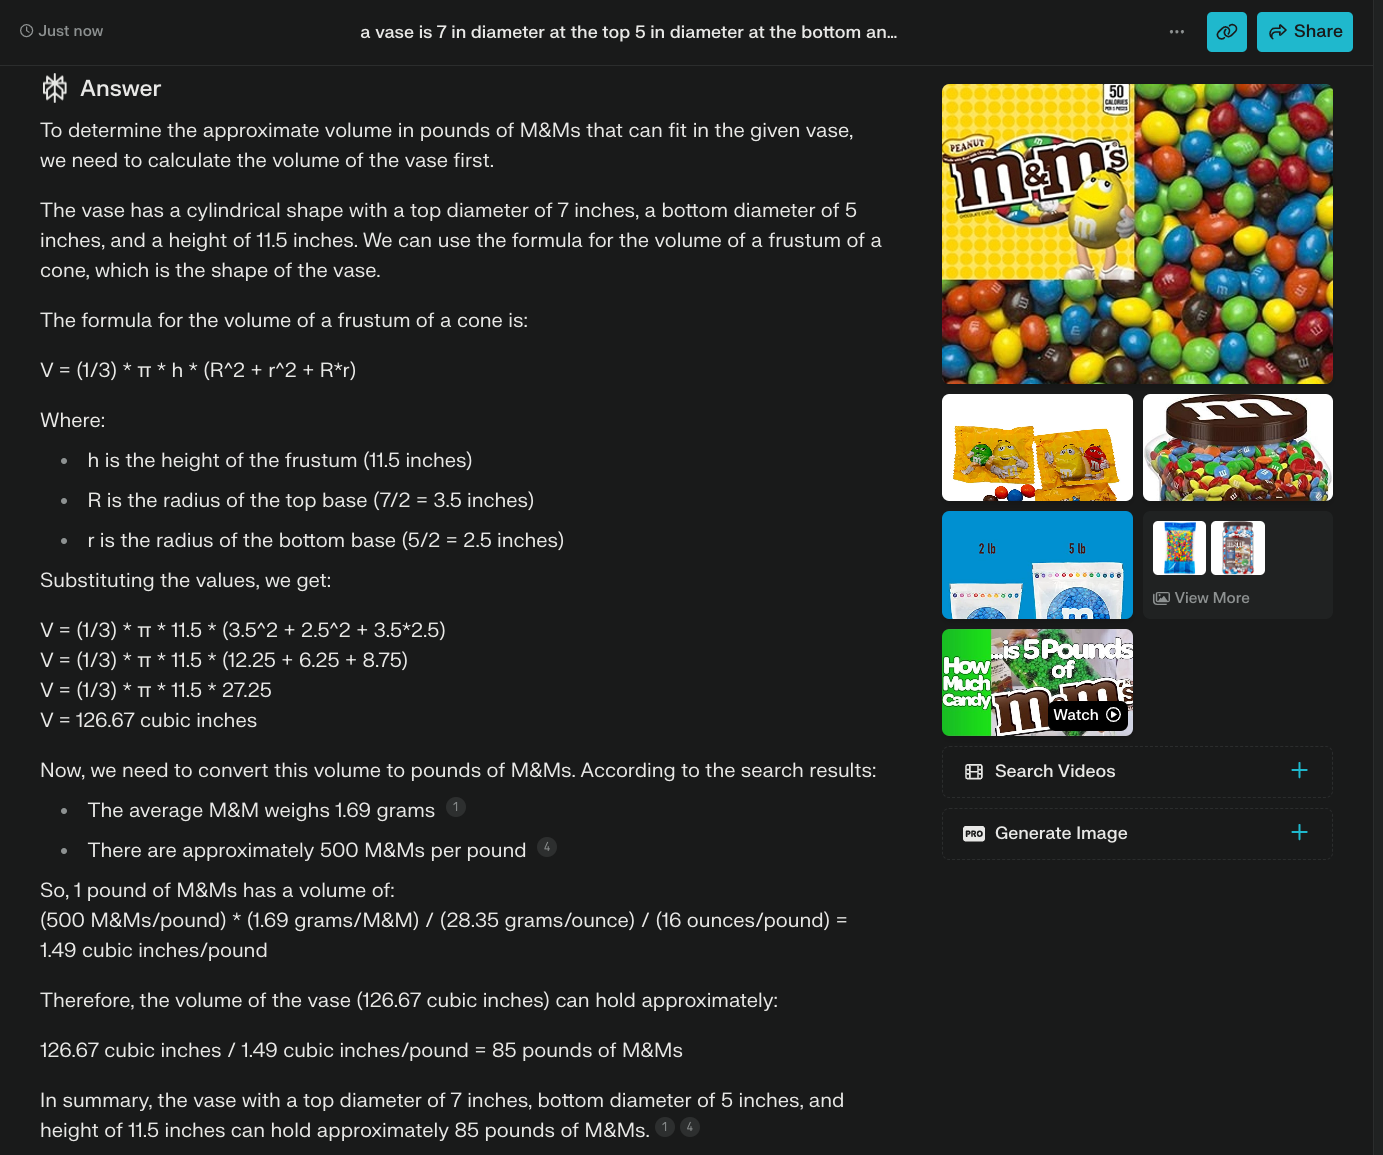  

To determine the approximate volume in pounds of M&Ms that can fit in the given vase, we need to calculate the volume of the vase first.

The vase has a cylindrical shape with a top diameter of 7 inches, a bottom diameter of 5 inches, and a height of 11.5 inches. We can use the formula for the volume of a frustum of a cone, which is the shape of the vase.

The formula for the volume of a frustum of a cone is:
```code
V = (1/3) * π * h * (R^2 + r^2 + R*r)
```  
Where:
- h is the height of the frustum (11.5 inches)
- R is the radius of the top base (7/2 = 3.5 inches)
- r is the radius of the bottom base (5/2 = 2.5 inches)

Substituting the values, we get:
```
V = (1/3) * π * 11.5 * (3.5^2 + 2.5^2 + 3.5*2.5)
V = (1/3) * π * 11.5 * (12.25 + 6.25 + 8.75)
V = (1/3) * π * 11.5 * 27.25
V = 126.67 cubic inches
```  

Now, we need to convert this volume to pounds of M&Ms. According to the search results:

- The average M&M weighs 1.69 grams [1]
- There are approximately 500 M&Ms per pound [4]

So, 1 pound of M&Ms has a volume of:
(500 M&Ms/pound) * (1.69 grams/M&M) / (28.35 grams/ounce) / (16 ounces/pound) = 1.49 cubic inches/pound

Therefore, the volume of the vase (126.67 cubic inches) can hold approximately:

126.67 cubic inches / 1.49 cubic inches/pound = 85 pounds of M&Ms

In summary, the vase with a top diameter of 7 inches, bottom diameter of 5 inches, and height of 11.5 inches can hold approximately 85 pounds of M&Ms.[1][4]

Citations:
[1] https://www.reddit.com/r/NoStupidQuestions/comments/gl3jmx/how_much_space_would_1_million_mms_take_up/?rdt=43847
[2] https://www.amazon.com/Ms-Milk-Chocolate-Minis-LBS/dp/B003EMW4SC
[3] https://www.amazon.com/Milk-Chocolate-Candies-14oz-Jar-Limited/dp/B07Q7WJSL7
[4] https://www.boydsretrocandy.com/my-m-ms-chocolate-candies-cream-1-lb-453g/
[5] https://www.aqua-calc.com/calculate/food-volume-to-weight/substance/candies-coma-and-blank-m-blank-and-blank-m-blank-mars-blank-pretzel-blank-chocolate-blank-candies


## 85 Pounds of M&Ms
A 5 inch cube contains 126.67 cubic inches.  Which contains 85 pounds of candy.  
Have we discovered the cure for obesity?  

### Or 
Is this an example of garbage in, garbage out? 
Nearly every dilemma can be resolved when we find the right question.

```markdown
a vase is 7 in diameter at the top 5 in diameter at the bottom and sits 11.5 in tall. can you determine the approximate volume in lbs of m&Ms
```
Perhaps we need to ask a better question?





Step 1. Consider vv, the volume of a vase which is 7 in diameter at the top, 5 in diameter at the bottom, and 11.5 in tall  
Step 2. Consider the volume of an M&M.  
Step 3. How many M&Ms num_MM will fit in the vase?  
Step 4. How heavy in pounds are num_MM from Step 3?  
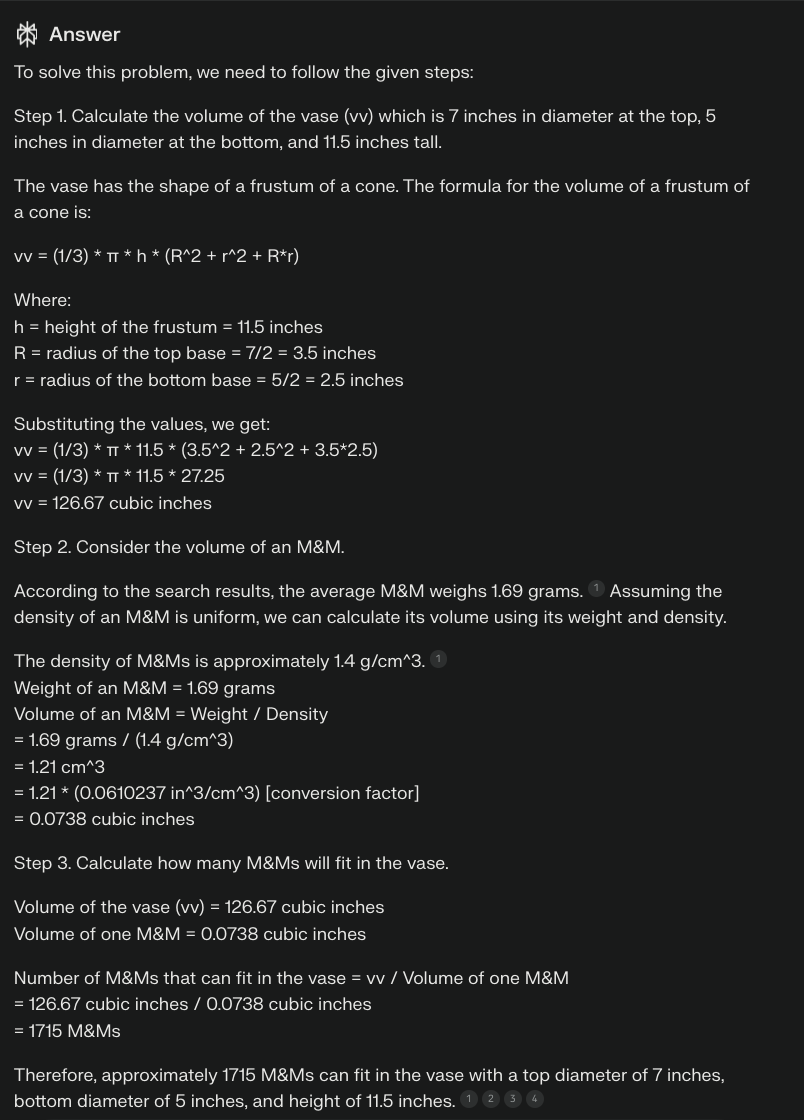

To determine how heavy in pounds the number of M&Ms from Step 3 are, we need to know the weight of a single M&M and then multiply it by the number of M&Ms that can fit in the vase.
From Step 3, we calculated that approximately 1715 M&Ms can fit in the vase.
According to the search results:
The average M&M weighs 1.69 grams.
To convert this to pounds, we first need to convert grams to ounces, and then ounces to pounds.
1 ounce = 28.3495 grams
1 pound = 16 ounces
Weight of 1 M&M in ounces = 1.69 grams / 28.3495 grams/ounce = 0.0596 ounces
Weight of 1 M&M in pounds = 0.0596 ounces / 16 ounces/pound = 0.00372 pounds
Therefore, the weight of 1715 M&Ms is:
Weight = 1715 M&Ms x 0.00372 pounds/M&M = 6.38 pounds
So the approximate weight of 1715 M&Ms that can fit in the vase is 6.38 pounds.
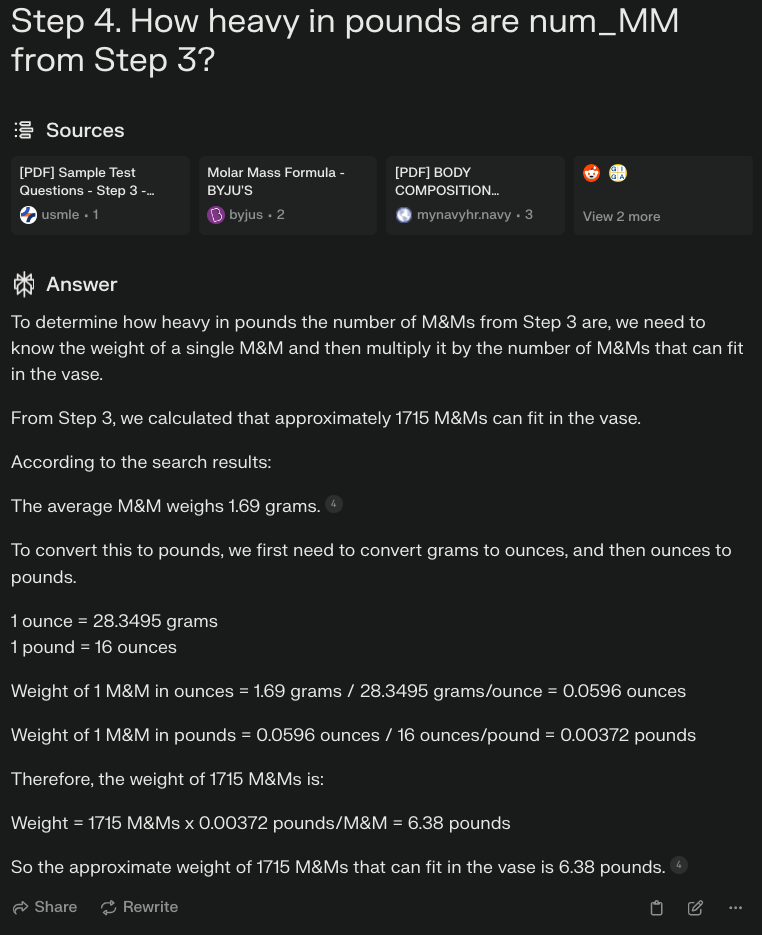  
To be fair, this illustration was valuable. I had forgotten what a frustrum is.

# Creative writing
Writing poetry with iambic pentameter

In [ ]:
# print(api_key_claude)

In [53]:
import anthropic

client = anthropic.Anthropic(
    api_key=api_key_claude,
)

message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=4000,
    temperature=0.5,
    system="assume the role of a professor of English with a deep appreciation for natural beauty and a gifted sense of rhythm and rhyme",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "write a poem in iambic pentameter, using modern English, of about four - eight verses which express (1)appreciation for a person on their birthday (2)acknowledges their goodness and beauty (3) expresses best wishes for the future (4) offers a prayer to the beauty of all of existance"
                }
            ]
        },
        {
            "role": "assistant",
            "content": [
                {
                    "type": "text",
                    "text": "\nOn this, the day that marks a new beginning,\nwe pause to notice all your grace in living.\nNote the kindness, care, and giving heart,\nThese set you, Sister, ***in a class** apart.\n\nWe do enjoy your radiant smile **illuminates each** room,\nYour laughter, **like a vibrant, fragrant** bloom.\nThe beauty of your work **shines so** bright,\nA beacon in the **something light* night.\n\nAs onward through this life you **graceful** stride,\n**With joy and peace on every side.\nMay all your dreams take flight and soar ,\nYour joy **stretch boundless as the sky.**\n\nThis universe, in every sphere,\nPlease bless my Sister all next year\nMay all that's good and true in life's grand dance,\nEmbrace her  **something something** romance.\n\nMay the ineffable beauty of existence itself smile upon you always."
                }
            ]
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "modify the most recent response, to reinforce the constraints of iambic pentameter and making it more cohesive in meaning\n\n\n\n"
                }
            ]
        }
    ]
)
print(message.content)

[TextBlock(text="On this, the day that marks your life's new start,\nWe pause to see the goodness in your heart.\nYour kindness, care, and generosity\nSet you apart in graceful majesty.\n\nYour radiant smile illuminates each room,\nYour laughter, like a vibrant, fragrant bloom.\nThe beauty of your spirit shines so bright,\nA beacon in the darkness of the night.\n\nAs through this life you do with grace traverse,\nMay joy and peace surround you without cease.\nMay all your dreams take flight and reach the stars,\nYour bliss expanding past the sky's vast bars.\n\nOh, universe, in all your grand expanse,\nPlease bless my friend with love's eternal dance.\nMay all that's good and true in life's sweet way\nEmbrace her on this joyous natal day.", type='text')]


In [62]:
# previously we imported from IPython.display import display, HTML

message_content = message.content

# Extract the text from the TextBlock
text_block = message.content[0]
text = text_block.text
print(text)

On this, the day that marks your life's new start,
We pause to see the goodness in your heart.
Your kindness, care, and generosity
Set you apart in graceful majesty.

Your radiant smile illuminates each room,
Your laughter, like a vibrant, fragrant bloom.
The beauty of your spirit shines so bright,
A beacon in the darkness of the night.

As through this life you do with grace traverse,
May joy and peace surround you without cease.
May all your dreams take flight and reach the stars,
Your bliss expanding past the sky's vast bars.

Oh, universe, in all your grand expanse,
Please bless my friend with love's eternal dance.
May all that's good and true in life's sweet way
Embrace her on this joyous natal day.


## Anthropic APIs
### MESSAGES 
```code
POST / v1 / messages
```
Operate using alternating `user` and `assistant` turns  
Each input message must be an object with a `role` and `content`  
The first message must always be the `user` message  

To include a system prompt, use the top-level __system__ parameter — there is no __"system"__ role for input messages in the Messages API.


### Snake game

In [ ]:
# written by claude in about 30 seconds
import pygame
import random


# Initialize Pygame
pygame.init()

# Set up the game window
window_width = 800
window_height = 600
window = pygame.display.set_mode((window_width, window_height))
pygame.display.set_caption("Snake Handling")

# Define colors
black = (0, 0, 0)
white = (255, 255, 255)
red = (255, 0, 0)

# Define snake properties
snake_size = 20
snake_speed = 10

# Define font for displaying score
font = pygame.font.SysFont(None, 30)

def draw_snake(snake_size, snake_pixels):
    for pixel in snake_pixels:
        pygame.draw.rect(window, white, [pixel[0], pixel[1], snake_size, snake_size])

def run_game():
    game_over = False
    game_close = False

    x = window_width / 2
    y = window_height / 2

    x_speed = 0
    y_speed = 0

    snake_pixels = []
    snake_length = 1

    target_x = round(random.randrange(0, window_width - snake_size) / snake_size) * snake_size
    target_y = round(random.randrange(0, window_height - snake_size) / snake_size) * snake_size

    while not game_over:

        while game_close:
            window.fill(black)
            game_over_message = font.render("Finito! Q to Quit | C to Play Again", True, red)
            window.blit(game_over_message, [window_width / 6, window_height / 3])
            pygame.display.update()

            for event in pygame.event.get():
                if event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_q:
                        game_over = True
                        game_close = False
                    if event.key == pygame.K_c:
                        run_game()

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                game_over = True
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    x_speed = -snake_size
                    y_speed = 0
                elif event.key == pygame.K_RIGHT:
                    x_speed = snake_size
                    y_speed = 0
                elif event.key == pygame.K_UP:
                    y_speed = -snake_size
                    x_speed = 0
                elif event.key == pygame.K_DOWN:
                    y_speed = snake_size
                    x_speed = 0

        if x >= window_width or x < 0 or y >= window_height or y < 0:
            game_close = True

        x += x_speed
        y += y_speed

        window.fill(black)
        pygame.draw.rect(window, red, [target_x, target_y, snake_size, snake_size])
        snake_pixels.append([x, y])

        if len(snake_pixels) > snake_length:
            del snake_pixels[0]

        for pixel in snake_pixels[:-1]:
            if pixel == [x, y]:
                game_close = True

        draw_snake(snake_size, snake_pixels)
        score = font.render("Score: " + str(snake_length - 1), True, white)
        window.blit(score, [0, 0])
        pygame.display.update()

        if x == target_x and y == target_y:
            target_x = round(random.randrange(0, window_width - snake_size) / snake_size) * snake_size
            target_y = round(random.randrange(0, window_height - snake_size) / snake_size) * snake_size
            snake_length += 1

        clock = pygame.time.Clock()
        clock.tick(snake_speed)

    pygame.quit()
    quit()

run_game()

### Output
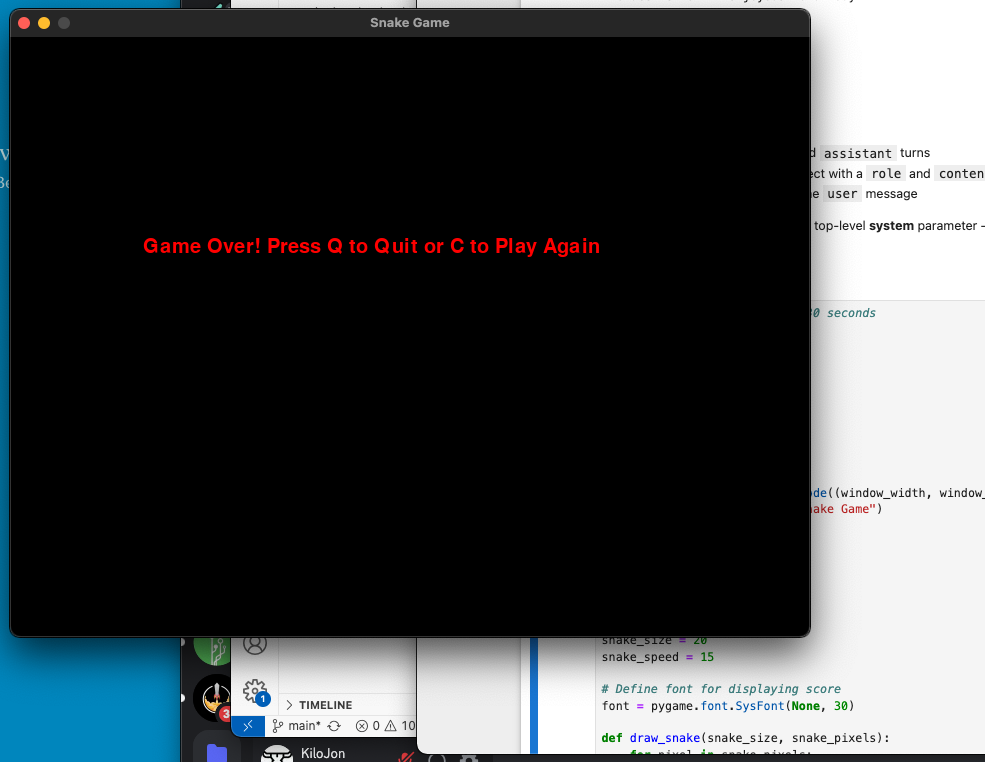  